<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_Assignment3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#RAJIT_BASU_20MAI0019
#GitHub Link:


In [3]:
# import libaries
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
np.random.seed(1000)

In [4]:
# load dataset
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


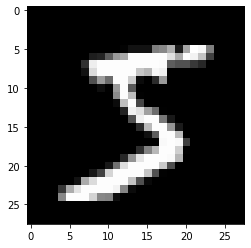

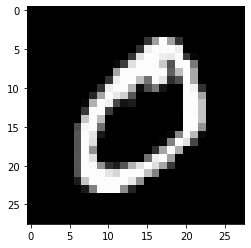

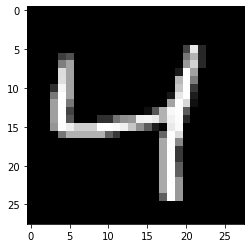

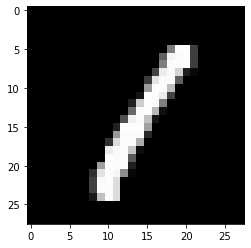

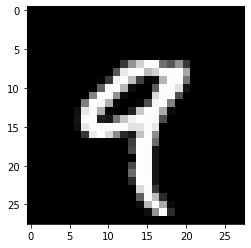

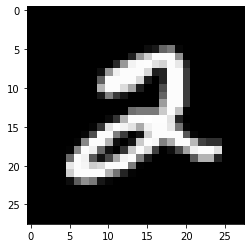

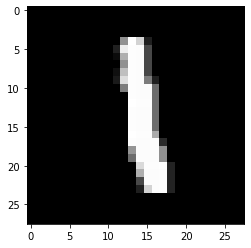

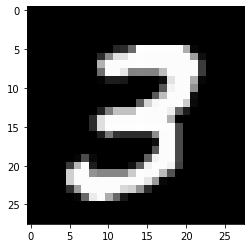

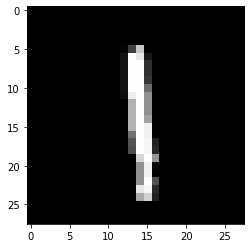

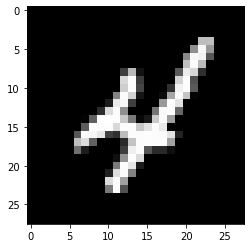

In [6]:
# diplay 10 images
for i in range(10):
    img = train_img[i].reshape((28,28))
    plt.imshow(img,cmap="gray")
    plt.show()

In [7]:
train_img = train_img.reshape(60000, 28,28,1)
test_img = test_img.reshape(10000,28,28,1)

In [8]:
# one hot encoding
train_lab_one_hot = to_categorical(train_lab)
test_lab_one_hot = to_categorical(test_lab)
print(train_lab_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[[[-1.1627930e-02 -1.0741624e-02  1.3495322e-02 ... -2.6498958e-03
   -1.9188615e-02  7.3880833e-03]
  [ 1.1153400e-02 -2.1986105e-03 -4.5172367e-03 ...  4.5261476e-03
    2.2157274e-02  1.9483153e-02]
  [ 2.1622412e-02  6.7358743e-03  1.7399605e-02 ...  1.9292962e-03
   -1.0121144e-02  9.4476379e-03]
  ...
  [-1.0057007e-02 -1.9159904e-02 -2.1626761e-02 ...  9.5666386e-03
   -1.5205484e-02 -1.3456121e-03]
  [ 1.7775726e-03  1.3759349e-02  2.5335979e-03 ...  1.6353372e-02
   -8.1528202e-03 -8.7008830e-03]
  [ 1.1072084e-02  1.7232202e-02  1.1420716e-02 ... -1.0868292e-02
    3.5443734e-03  2.1279328e-02]]

 [[ 5.2169096e-03  5.3490829e-03 -1.4157960e-02 ...  1.4257353e-02
   -1.4376188e-02 -1.7325599e-03]
  [ 1.3136461e-02  7.7437982e-03  1.6551472e-02 ... -2.6311837e-03
   -7.1592135e-03 -1.0359889e-02]
  [-2.0962974e-02 -1.6063845e-02  2.0172764e-03 ... -2.1542193e-02
    1.3939846e-02 -1.6620267e-02]
  ...
  [-6.3123293e-03  2.0528890e-02 -6.5561570e-03 ... -1.0079178e-02
   -5.4009

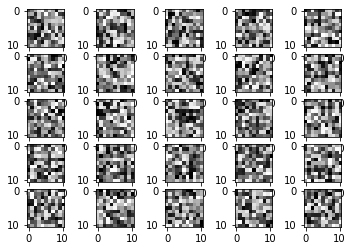

In [9]:
#load Alexnet Model
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
x=Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=(28,28,1))
AlexNet.add(x)

xlw = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    print(xlw)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(xlw[:,:,i],interpolation="nearest",cmap="gray")
plt.show()
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


In [10]:
#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 96)          11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 7, 7, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [11]:
#Compiling Model
AlexNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
hist = AlexNet.fit(train_img, train_lab_one_hot,
            validation_data=(test_img, test_lab_one_hot),
                 epochs=3)

Epoch 1/3
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3518 - accuracy: 0.9312 - val_loss: 0.2158 - val_accuracy: 0.9497
Epoch 2/3
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1600 - accuracy: 0.9651 - val_loss: 0.1525 - val_accuracy: 0.9642
Epoch 3/3
1875/1875 [==============================] - 68s 37ms/step - loss: 0.1081 - accuracy: 0.9742 - val_loss: 0.2690 - val_accuracy: 0.8998


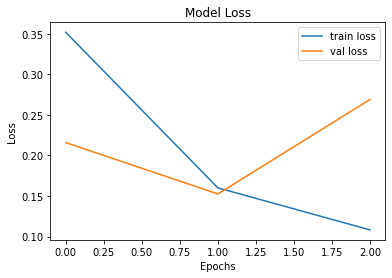

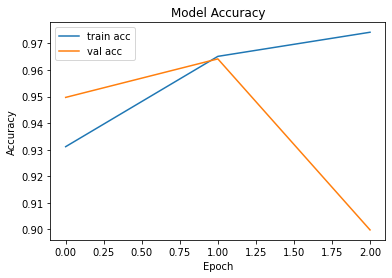

In [14]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
print(AlexNet.evaluate(test_img, test_lab_one_hot))

313/313 [==============================] - 3s 9ms/step - loss: 0.2690 - accuracy: 0.8998
[0.2689657509326935, 0.8998000025749207]


In [17]:
pred = AlexNet.predict(test_img[:5])
pred

array([[2.6708806e-03, 3.1793683e-03, 1.1364326e-03, 1.3492659e-03,
        1.0482635e-03, 4.4941250e-03, 6.3096471e-03, 9.7246933e-01,
        1.5407403e-03, 5.8018919e-03],
       [6.9421674e-03, 5.5765924e-03, 4.1077739e-01, 4.3900795e-03,
        3.6338314e-03, 1.9050875e-03, 5.5107719e-01, 1.8560910e-03,
        1.0581098e-02, 3.2604716e-03],
       [1.3833531e-03, 9.9148798e-01, 5.3755386e-04, 5.4873276e-04,
        2.6555106e-04, 6.0129352e-04, 3.4964138e-03, 6.8615802e-04,
        5.1902537e-04, 4.7389514e-04],
       [9.6394187e-01, 1.3538522e-03, 1.6252416e-04, 3.7046795e-04,
        1.3616230e-04, 5.4281903e-04, 3.2383360e-02, 2.3230212e-04,
        5.7598058e-04, 3.0065569e-04],
       [5.4224289e-04, 4.3084258e-03, 4.6187255e-04, 5.6981074e-04,
        9.8975122e-01, 9.3519333e-04, 3.5647949e-04, 1.9887846e-04,
        8.8682707e-04, 1.9889695e-03]], dtype=float32)

In [18]:
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:5])

[7 6 1 0 4]
[7 2 1 0 4]


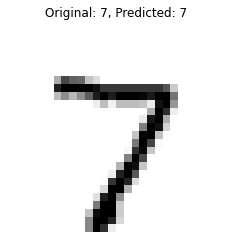

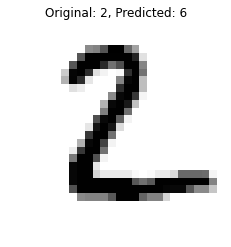

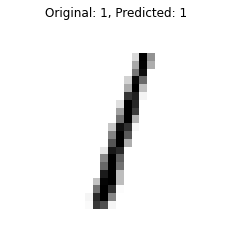

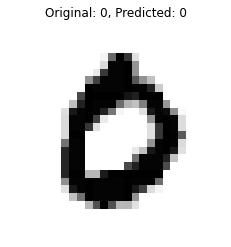

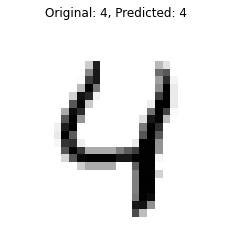

<Figure size 432x288 with 0 Axes>

In [19]:
#Visualizing prediction
for i in range(5):
  plt.imshow(test_img[i].reshape((28,28)), cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
  plt.axis("Off")
  plt.figure()